Importing necessary libraries

In [2]:
#!pip uninstall prince
#!pip install --upgrade https://github.com/MaxHalford/prince/tarball/master
#!pip install scipy
%matplotlib notebook
#import scipy
#import mca as prince
#import pca
#import plot
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import prince
import operator
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
prince.__file__

'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\prince\\__init__.py'

MCA plot of a given subset of columns, currently 11-65. Does not include the first 11 as these have so many N/A's that we dont have enough data to use. N/A's are just deleted so only using information from students that have filled in the whole questionnaire.

Num Rows Before: 13734
Num Rows After: 1597
Percentage Rows Dropped: 88%


<IPython.core.display.Javascript object>


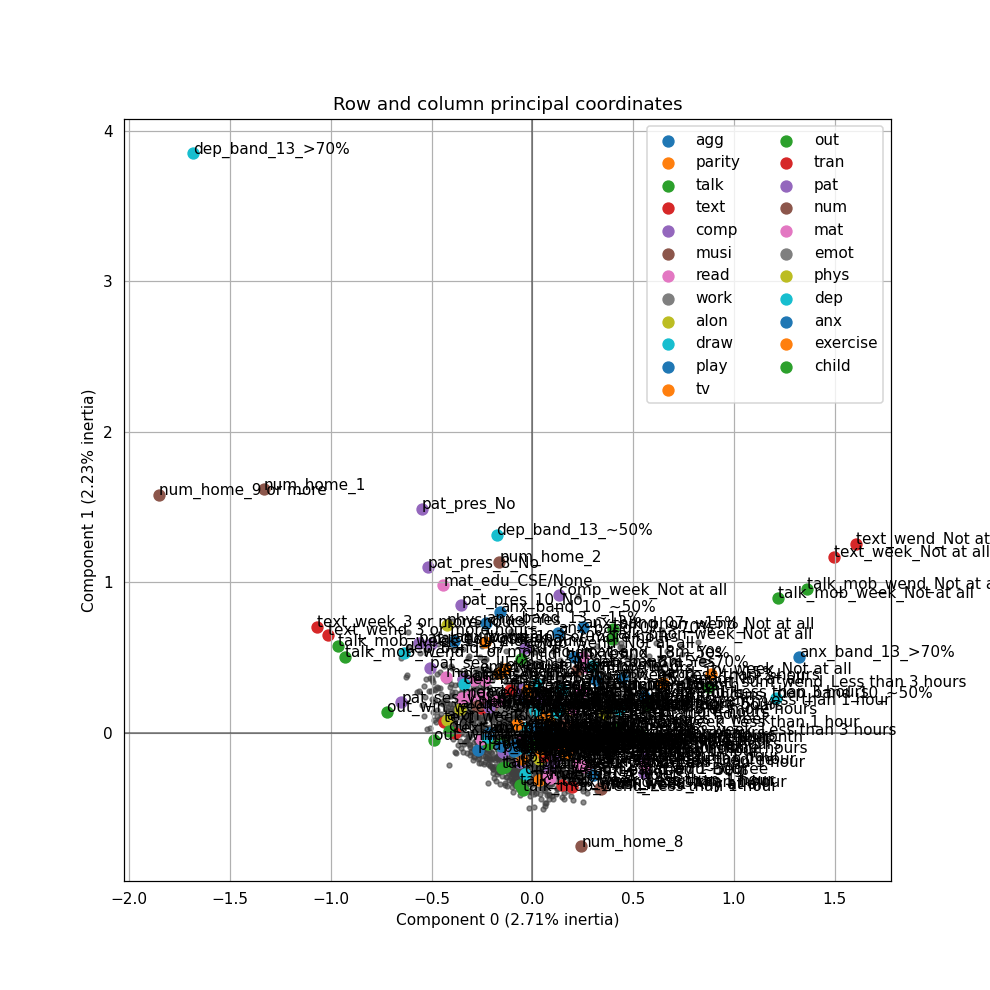

,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,...,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull
0,Any at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,...,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~3%,~3%,5 or more times a week,No
8,Any at all,Less than 1 hour,Less than 1 hour,3 or more hours,Any at all,Not at all,3 or more hours,1-2 hours,Less than 1 hour,3 or more hours,...,~15%,<0.1%,<0.1%,<0.1%,~15%,~0.5%,~0.5%,~0.5%,5 or more times a week,No
16,Not at all,Not at all,Not at all,1-2 hours,Not at all,Less than 1 hour,3 or more hours,3 or more hours,Not at all,Less than 3 hours,...,<0.1%,~0.5%,~0.5%,~0.5%,~3%,~3%,~3%,~3%,1-4 times a week,No
35,Any at all,Less than 1 hour,Less than 1 hour,1-2 hours,Any at all,Less than 1 hour,1-2 hours,3 or more hours,1 or more hours,3 or more hours,...,~0.5%,~0.5%,~15%,<0.1%,~3%,~3%,~3%,~0.5%,1-4 times a week,No
39,Any at all,Less than 1 hour,Less than 1 hour,1-2 hours,Any at all,Not at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,3 or more hours,...,~0.5%,~0.5%,~0.5%,~50%,~3%,~3%,~15%,~50%,1-4 times a week,No


In [3]:
depression_df = pd.read_csv("maps-synthetic-data-v1.1.csv")
maxcol = 65
mincol = 11
subset = depression_df.iloc[:, mincol:maxcol] #85 is max 

before = subset.shape[0]
subset = subset.dropna()
after = subset.shape[0]
percentagelost = (before-after)/before

print("Num Rows Before: "+str(before))
print("Num Rows After: "+str(after))
print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%")

mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(subset)
ax = mca.plot_coordinates(X=subset,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=50,show_column_labels=True,legend_n_cols=2)

ax.get_figure().savefig('MCA_columns_in_range_'+str(mincol)+'_to_'+str(maxcol)+'.svg')
subset.head()

This now runs MCA on specific named columns rather than a subset range. The ones I have chosen here are the columns which caused the highest variability in the MCA for columns 11-65 by inspection

Num Rows Before: 13734
Num Rows After: 2659
Percentage Rows Dropped: 80%


<IPython.core.display.Javascript object>


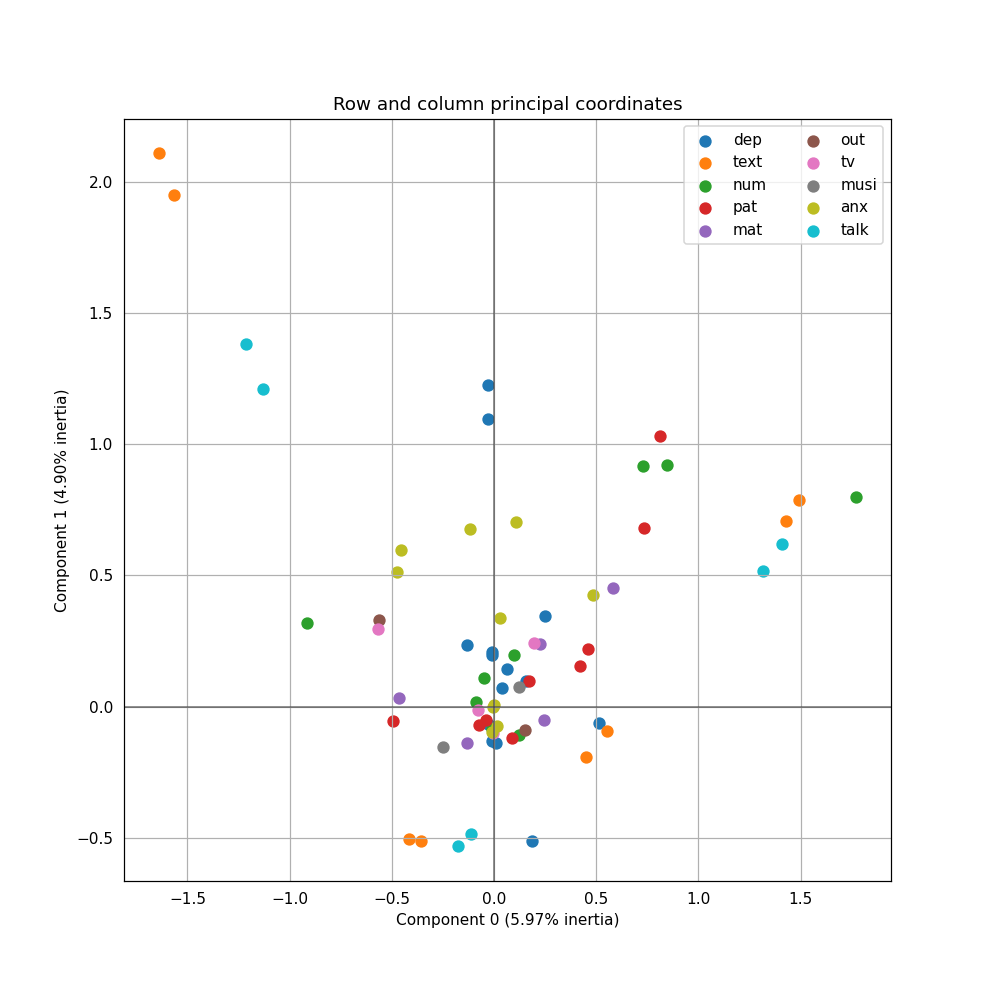

In [4]:
subsetnames = ["dep_band_13","dep_band_07","dep_band_10","text_wend","text_week","num_home","pat_pres","pat_pres_8","mat_edu","out_sum_wend","tv_week","musi_week","anx_band_13","anx_band_07","pat_edu","talk_mob_wend","talk_mob_week"]
subset = depression_df[subsetnames]

before = subset.shape[0]
subset = subset.dropna()
after = subset.shape[0]
percentagelost = (before-after)/before
print("Num Rows Before: "+str(before))
print("Num Rows After: "+str(after))
print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%")

mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(subset)
ax = mca.plot_coordinates(X=subset,ax=None,figsize=(9, 9),show_row_points=False,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=50,show_column_labels=False,legend_n_cols=2)

ax.get_figure().savefig('Highest_Variability_Columns_1.svg')
#subset.head()

This subset used here are the highest variability columns from the previous subset of highest variability columns.

Num Rows Before: 13734
Num Rows After: 3031
Percentage Rows Dropped: 77%


<IPython.core.display.Javascript object>


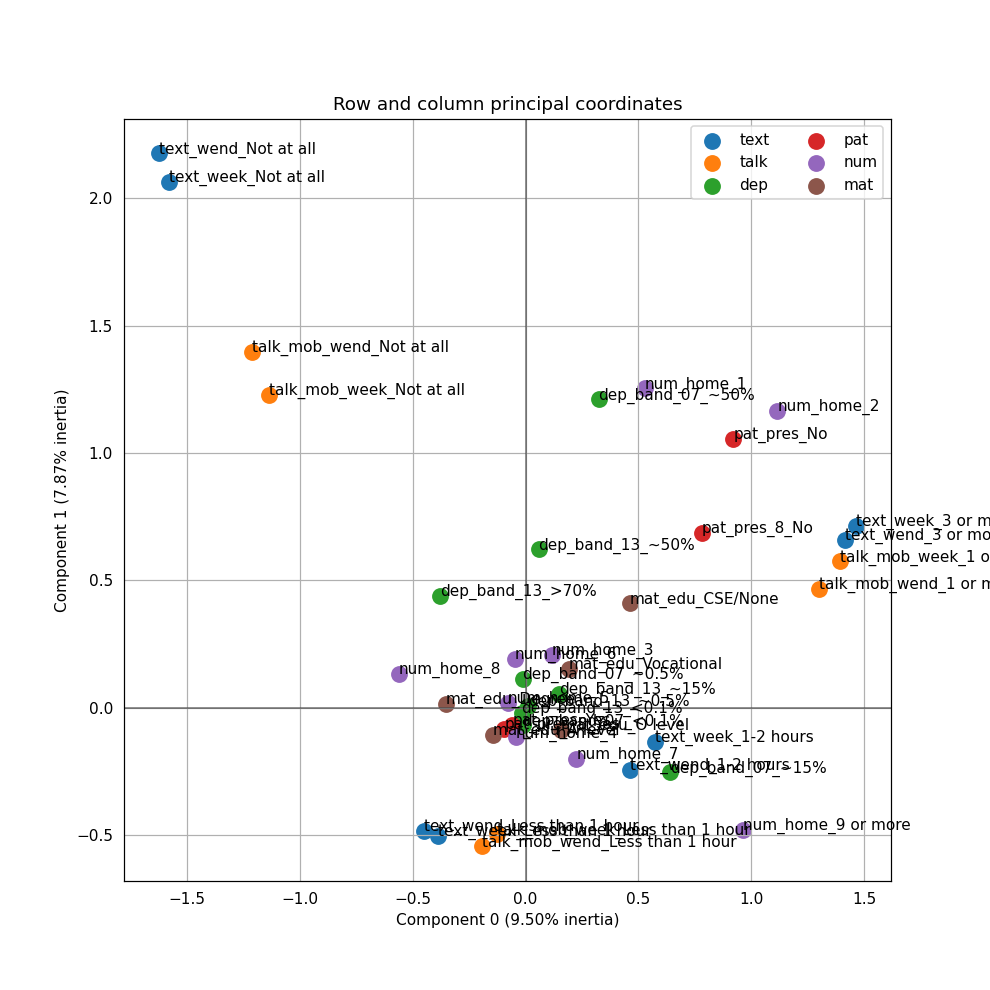

,text_wend,text_week,talk_mob_wend,talk_mob_week,dep_band_13,dep_band_07,pat_pres,pat_pres_8,num_home,mat_edu
0,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,~0.5%,~0.5%,Yes,Yes,4,A level
8,Less than 1 hour,3 or more hours,Less than 1 hour,1 or more hours,<0.1%,<0.1%,Yes,Yes,4,Vocational
16,Not at all,Not at all,Not at all,Not at all,~0.5%,~0.5%,Yes,Yes,4,O level
33,3 or more hours,3 or more hours,Less than 1 hour,Less than 1 hour,<0.1%,~0.5%,Yes,No,4,O level
35,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,~0.5%,<0.1%,Yes,Yes,4,A level


In [5]:
subsetnames = ["text_wend","text_week","talk_mob_wend","talk_mob_week","dep_band_13","dep_band_07","pat_pres","pat_pres_8","num_home","mat_edu"]
subset = depression_df[subsetnames]

before = subset.shape[0]
subset = subset.dropna()
after = subset.shape[0]
percentagelost = (before-after)/before
print("Num Rows Before: "+str(before))
print("Num Rows After: "+str(after))
print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%")

mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(subset)
ax = mca.plot_coordinates(X=subset,ax=None,figsize=(9, 9),show_row_points=False,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=100,show_column_labels=True,legend_n_cols=2)

ax.get_figure().savefig('Highest_Variability_Columns_2.svg')
subset.head()

This next subset used here is a subset of all the columns containing specifically variables bately measuring levels of depression and amount of screen/phone time. (and i added sex)

Num Rows Before: 13734
Num Rows After: 688
Percentage Rows Dropped: 94%


<IPython.core.display.Javascript object>


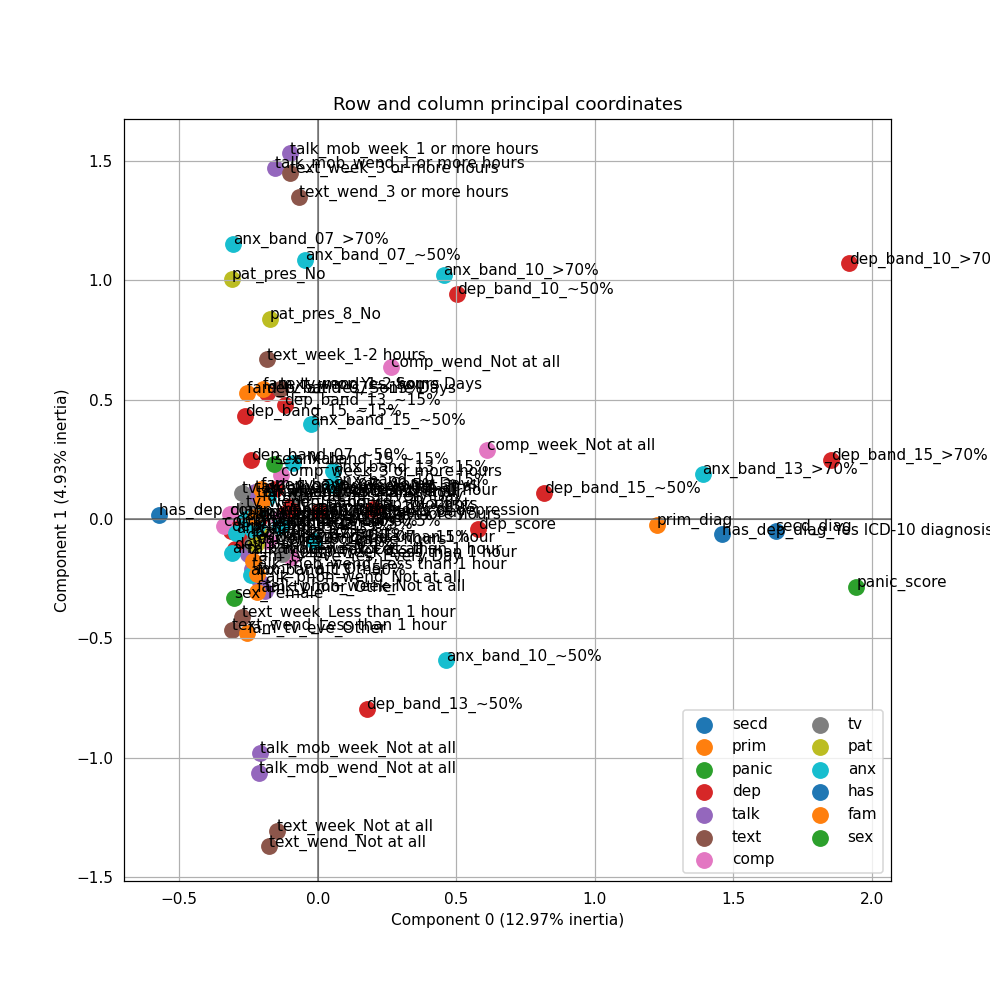

,talk_phon_wend,talk_phon_week,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,...,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex
33,Any at all,Any at all,3 or more hours,1-2 hours,Less than 1 hour,1-2 hours,3 or more hours,Less than 1 hour,1-2 hours,Less than 1 hour,...,No ICD-10 diagnosis of depression,0.0,1.0,0.0,2.0,2.0,"Yes, Some Days","Yes, Some Days","Yes, Some Days",Female
66,Any at all,Any at all,1-2 hours,Not at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,1 or more hours,Less than 1 hour,Less than 1 hour,...,Yes ICD-10 diagnosis of depression,4.0,11.0,0.0,3.0,3.0,"Yes, Every Day","Yes, Every Day","Yes, Some Days",Male
109,Any at all,Any at all,Less than 1 hour,3 or more hours,Less than 1 hour,Not at all,Less than 1 hour,Less than 1 hour,3 or more hours,Not at all,...,Yes ICD-10 diagnosis of depression,6.0,12.0,0.0,5.0,4.0,"Yes, Every Day",Other,Other,Male
119,Any at all,Any at all,3 or more hours,Less than 1 hour,1 or more hours,Less than 1 hour,3 or more hours,1 or more hours,1-2 hours,1-2 hours,...,No ICD-10 diagnosis of depression,0.0,0.0,0.0,1.0,0.0,"Yes, Some Days",Other,"Yes, Every Day",Male
216,Any at all,Any at all,Less than 1 hour,3 or more hours,1 or more hours,1-2 hours,Less than 1 hour,Less than 1 hour,3 or more hours,Less than 1 hour,...,No ICD-10 diagnosis of depression,0.0,0.0,0.0,1.0,0.0,"Yes, Some Days","Yes, Some Days","Yes, Some Days",Male


In [6]:
subsetnames =  ["talk_phon_wend","talk_phon_week","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","dep_band_15","pat_pres","pat_pres_8","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07","has_dep_diag","secd_diag","prim_diag","panic_score","dep_thoughts","dep_score","fam_tv_eve","fam_tv_aft","fam_tv_mor","sex"]
subset = depression_df[subsetnames]

before = subset.shape[0]
subset = subset.dropna()
after = subset.shape[0]
percentagelost = (before-after)/before
print("Num Rows Before: "+str(before))
print("Num Rows After: "+str(after))
print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%")

mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(subset)
ax = mca.plot_coordinates(X=subset,ax=None,figsize=(9, 9),show_row_points=False,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=100,show_column_labels=True,legend_n_cols=2)

ax.get_figure().savefig('Highest_Variability_Columns_2.svg')
subset.head()

This now calculates the distance of each marked point to the centre and orderes them to find the columns which likely explain the most variability in the data.

In [7]:
import operator
coords = mca.column_coordinates(subset)
dists = np.linalg.norm(coords,axis=1)
zipped = list(zip(coords.index.values, dists))
zipped = sorted(zipped, key = operator.itemgetter(1),reverse = True)
for i in range (len(zipped)):
    print(str(zipped[i][0]) + " : " + str(zipped[i][1]))

dep_band_10_>70% : 2.1956821451869364
panic_score : 1.9640891637614388
dep_band_15_>70% : 1.869688959687744
secd_diag : 1.6532474781432702
talk_mob_week_1 or more hours : 1.534728451276947
talk_mob_wend_1 or more hours : 1.4776850532666694
has_dep_diag_Yes ICD-10 diagnosis of depression : 1.4603145552916403
text_week_3 or more hours : 1.4549293007438548
anx_band_13_>70% : 1.401779237584439
text_wend_Not at all : 1.382543122331229
text_wend_3 or more hours : 1.352100582802544
text_week_Not at all : 1.3134988571126098
prim_diag : 1.2249030164169727
anx_band_07_>70% : 1.191708601538028
anx_band_10_>70% : 1.1200851119806479
anx_band_07_~50% : 1.0850379148146183
talk_mob_wend_Not at all : 1.0843774762390097
dep_band_10_~50% : 1.0706322268814044
pat_pres_No : 1.0524455767344862
talk_mob_week_Not at all : 1.0000335477869127
pat_pres_8_No : 0.8568732602613619
dep_band_15_~50% : 0.8234537350373784
dep_band_13_~50% : 0.8159761418626227
anx_band_10_~50% : 0.7511126001840951
text_week_1-2 hours : 

This piece of code does the following. It takes the set of variables which specifically quantify the depression level of a child and runs mca with these variables in addition to only one extra variable not to do with depression. it repeats this for all the possible other variables not to do with depression. Now each time it will check how far that added variable is from the centre hence telling us how much effect that single variable has on varying the depression quantifier variables. 

Further more because the amount of initia aka percentage of total variation explained is important, each time mca is run for a certain variable, the total amount of explained variability from that mca's pricipal co ordinates is calculated. 

In [8]:
output = []
depression_quantifiers = ["dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07","has_dep_diag","secd_diag","prim_diag","panic_score","dep_score"]
for column in depression_df.columns:
    if column not in depression_quantifiers:
        testcolumns = depression_quantifiers[:]
        testcolumns.append(column)
        testcolumns_df = depression_df[testcolumns]
        
        before = testcolumns_df.shape[0]
        testcolumns_df = testcolumns_df.dropna()
        after = testcolumns_df.shape[0]
        percentagelost = (before-after)/before
        print("Column: "+ column)
        print("Num Rows Before: "+str(before))
        print("Num Rows After: "+str(after))
        print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%")
        
        mca = prince.MCA( n_components=2, n_iter=5, copy=True,check_input=True,engine='auto',random_state=42)
        mca = mca.fit(testcolumns_df)
        column_coordinates = mca.column_coordinates(testcolumns_df)
        column_distances = np.linalg.norm(column_coordinates,axis=1)
        
        total_inertia = (mca.explained_inertia_[0] + mca.explained_inertia_[1])*100
        print("Total Inertia : "+str(total_inertia))
        intertias_list = []
        for i in range(len(column_distances)):
            intertias_list.append(total_inertia)
            
        zipped = list(zip(column_coordinates.index.values, column_distances,intertias_list))
        zipped = sorted(zipped, key = operator.itemgetter(1),reverse = True)
        for i in range(len(zipped)):
            if column in str(zipped[i][0]):
                print(zipped[i][0] + " Distance: " + str(zipped[i][1]) + "\n")
                output.append(zipped[i])
output = sorted(output, key = operator.itemgetter(1),reverse = True)

Column: Unnamed: 0
Num Rows Before: 13734
Num Rows After: 2523
Percentage Rows Dropped: 81%
Total Inertia : 0.48861137282041506
Unnamed: 0 Distance: 0.0024045671946867925

Column: X
Num Rows Before: 13734
Num Rows After: 2523
Percentage Rows Dropped: 81%
Total Inertia : 0.48861137282041506
X Distance: 0.0024045671946867925

Column: flag
Num Rows Before: 13734
Num Rows After: 2523
Percentage Rows Dropped: 81%
Total Inertia : 32.09998231066898
flag_synthetic Distance: 0.30209518394433693

Column: comp_bed_9
Num Rows Before: 13734
Num Rows After: 2312
Percentage Rows Dropped: 83%
Total Inertia : 31.02697217131861
comp_bed_9_Yes Distance: 0.33480311752559366

comp_bed_9_No Distance: 0.2914054418153896

Column: mat_dep
Num Rows Before: 13734
Num Rows After: 2432
Percentage Rows Dropped: 82%
Total Inertia : 28.75671149176445
mat_dep Distance: 0.4780953480692133

Column: mat_age
Num Rows Before: 13734
Num Rows After: 2519
Percentage Rows Dropped: 81%
Total Inertia : 16.915337942364953
mat_age

Total Inertia : 31.055458415524896
musi_week_Not at all Distance: 0.3001089320794112

musi_week_Any at all Distance: 0.2934087977169061

Column: read_week
Num Rows Before: 13734
Num Rows After: 2069
Percentage Rows Dropped: 84%
Total Inertia : 30.175708431462812
read_week_Not at all Distance: 0.3407251320577763

read_week_Less than 1 hour Distance: 0.31234427839907875

read_week_1 or more hours Distance: 0.2964674773592349

Column: work_week
Num Rows Before: 13734
Num Rows After: 2073
Percentage Rows Dropped: 84%
Total Inertia : 30.167738541719437
work_week_3 or more hours Distance: 0.3377237982082797

work_week_Less than 1 hour Distance: 0.32830371547058945

work_week_1-2 hours Distance: 0.30715427768535286

Column: alon_week
Num Rows Before: 13734
Num Rows After: 2077
Percentage Rows Dropped: 84%
Total Inertia : 30.10480667068173
alon_week_1-2 hours Distance: 0.32698975386181894

alon_week_Less than 1 hour Distance: 0.2832523933452978

alon_week_3 or more hours Distance: 0.2708609696

Column: own_mob
Num Rows Before: 13734
Num Rows After: 1208
Percentage Rows Dropped: 91%
Total Inertia : 31.825470268947985
own_mob_No Distance: 0.3552574672293695

own_mob_Yes Distance: 0.31248395643955007

Column: dep_thoughts
Num Rows Before: 13734
Num Rows After: 979
Percentage Rows Dropped: 92%
Total Inertia : 25.965504959202278
dep_thoughts Distance: 0.05061394850188597

Column: comp_house
Num Rows Before: 13734
Num Rows After: 280
Percentage Rows Dropped: 97%
Total Inertia : 32.90473492123941
comp_house_Yes Distance: 0.3364088147067312

Column: tv_bed_16
Num Rows Before: 13734
Num Rows After: 1365
Percentage Rows Dropped: 90%
Total Inertia : 32.186182973658056
tv_bed_16_Yes Distance: 0.30458808243867963

Column: creat_14
Num Rows Before: 13734
Num Rows After: 2507
Percentage Rows Dropped: 81%
Total Inertia : 31.110999750576944
creat_14_often Distance: 0.3325975638224088

creat_14_sometimes Distance: 0.2972742160090441

Column: comp_games
Num Rows Before: 13734
Num Rows After: 23

I then standardised the values of these inertia percentages and distances from centres for each added variable in order to combine the two values into one standardised score for the variable, telling us how good it is at causing variability in the depression quantifying variables. The ordered list is printed out.

In [9]:
output_np = np.array(output)
meandistance = np.mean(output_np[:,1].astype(np.float))
meaninertia = np.mean(output_np[:,2].astype(np.float))
stddistance = np.std(output_np[:,1].astype(np.float))
stdinertia = np.std(output_np[:,2].astype(np.float))
columnames = []
standadised_scores = []

for i in range(len(output)):
    columnames.append(output[i][0])
    standadised_scores.append(((output[i][1] - meandistance )/stddistance)+((output[i][2] - meaninertia )/stdinertia))

zipped = list(zip(columnames, standadised_scores))
zipped = sorted(zipped, key = operator.itemgetter(1),reverse = True)
for i in range(len(output)):
    print(str(i+1)+") "+zipped[i][0] + " : "+str(zipped[i][1]))

1) num_home_9 or more : 9.548209964751823
2) mat_age_>43 : 4.774226242771292
3) mat_ses_Armed forces : 2.785556996746688
4) mat_anx_18m_Yes : 2.081694527931797
5) mat_anx_1_Yes : 2.0137494988777824
6) mat_anx_0m_Yes : 1.575908361471083
7) mat_anx_8m_Yes : 1.4988798983718514
8) comp_noint_bed_16_Yes : 1.4452504498752363
9) child_bull_Yes : 1.3759507552138028
10) mat_ses_i : 1.2960171979779476
11) comp_week_Not at all : 1.2260744086436357
12) mat_edu_Degree : 1.0076713305576634
13) sex_Female : 0.9529365938814663
14) mat_dep : 0.9304452104909121
15) comp_house_Yes : 0.9023879606261713
16) mat_edu_CSE/None : 0.8660692115717169
17) own_mob_No : 0.8177057312272431
18) num_home_8 : 0.7998643163894482
19) emot_cruel_Yes : 0.7761735228384661
20) mat_anx_1_No : 0.7440431019541334
21) comp_int_bed_16_Yes : 0.7160019843283685
22) parity : 0.6697281141768414
23) num_home_7 : 0.6654104791787796
24) mat_anx_18m_No : 0.6595406618920023
25) talk_mob_wend_1 or more hours : 0.6570032044879903
26) mat_an

<ipython-input-9-c602d83e1845>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  meandistance = np.mean(output_np[:,1].astype(np.float))
<ipython-input-9-c602d83e1845>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  meaninertia = np.mean(output_np[:,2].astype(np.float))
<ipython-input-9-c602d83e1845>:4: DeprecationWarning: `np.float` is a

Doing the same thing as above but the other way round. so using variales purely to do with screen time quantifying and checking mca with all the other columns and see which variables are explained alot by the screen time quantifiers.

In [10]:
output = []
screentime_quantifiers = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor"]
for column in depression_df.columns:
    if column not in screentime_quantifiers:
        testcolumns = screentime_quantifiers[:]
        testcolumns.append(column)
        testcolumns_df = depression_df[testcolumns]
        
        before = testcolumns_df.shape[0]
        testcolumns_df = testcolumns_df.dropna()
        after = testcolumns_df.shape[0]
        percentagelost = (before-after)/before
        print("Column: "+ column)
        print("Num Rows Before: "+str(before))
        print("Num Rows After: "+str(after))
        print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%")
        
        mca = prince.MCA( n_components=2, n_iter=5, copy=True,check_input=True,engine='auto',random_state=42)
        mca = mca.fit(testcolumns_df)
        column_coordinates = mca.column_coordinates(testcolumns_df)
        column_distances = np.linalg.norm(column_coordinates,axis=1)
        
        total_inertia = (mca.explained_inertia_[0] + mca.explained_inertia_[1])*100
        print("Total Inertia : "+str(total_inertia))
        intertias_list = []
        for i in range(len(column_distances)):
            intertias_list.append(total_inertia)
            
        zipped = list(zip(column_coordinates.index.values, column_distances,intertias_list))
        zipped = sorted(zipped, key = operator.itemgetter(1),reverse = True)
        for i in range(len(zipped)):
            if column in str(zipped[i][0]):
                print(zipped[i][0] + " Distance: " + str(zipped[i][1]) + "\n")
                output.append(zipped[i])
output = sorted(output, key = operator.itemgetter(1),reverse = True)


Column: Unnamed: 0
Num Rows Before: 13734
Num Rows After: 4293
Percentage Rows Dropped: 68%
Total Inertia : 0.29980112248436724
Unnamed: 0 Distance: 0.0028087442552537944

Column: X
Num Rows Before: 13734
Num Rows After: 4293
Percentage Rows Dropped: 68%
Total Inertia : 0.29980112248436724
X Distance: 0.0028087442552537944

Column: flag
Num Rows Before: 13734
Num Rows After: 4293
Percentage Rows Dropped: 68%
Total Inertia : 18.93809925644337
flag_synthetic Distance: 2.231195677441254e-16

Column: comp_bed_9
Num Rows Before: 13734
Num Rows After: 3732
Percentage Rows Dropped: 72%
Total Inertia : 18.256216426643757
comp_bed_9_Yes Distance: 0.1803453342204625

comp_bed_9_No Distance: 0.04274011069527021

Column: mat_dep
Num Rows Before: 13734
Num Rows After: 4056
Percentage Rows Dropped: 70%
Total Inertia : 15.458943799264556
mat_dep Distance: 0.06327768477765072

Column: mat_age
Num Rows Before: 13734
Num Rows After: 4282
Percentage Rows Dropped: 68%
Total Inertia : 9.806540713531037
mat

Total Inertia : 14.95950409287436
num_home_1 Distance: 0.9290104277237555

num_home_2 Distance: 0.6191597466789568

num_home_9 or more Distance: 0.38665542761807503

num_home_8 Distance: 0.36161208512986526

num_home_7 Distance: 0.26743946644615385

num_home_6 Distance: 0.19533734103370456

num_home_3 Distance: 0.18459502852200477

num_home_4 Distance: 0.10336579748326284

num_home_5 Distance: 0.07498810588599882

Column: mat_anx_1
Num Rows Before: 13734
Num Rows After: 4013
Percentage Rows Dropped: 70%
Total Inertia : 18.27195585151961
mat_anx_1_Yes Distance: 0.051736827800734554

mat_anx_1_No Distance: 0.014765379106487724

Column: mat_anx_18m
Num Rows Before: 13734
Num Rows After: 3966
Percentage Rows Dropped: 71%
Total Inertia : 18.410891871119645
mat_anx_18m_Yes Distance: 0.18512137617715613

mat_anx_18m_No Distance: 0.03960815486618669

Column: mat_anx_8m
Num Rows Before: 13734
Num Rows After: 4068
Percentage Rows Dropped: 70%
Total Inertia : 18.328475090695644
mat_anx_8m_Yes Dis

Column: has_dep_diag
Num Rows Before: 13734
Num Rows After: 2765
Percentage Rows Dropped: 79%
Total Inertia : 18.4329392642892
has_dep_diag_Yes ICD-10 diagnosis of depression Distance: 0.2533820623364742

has_dep_diag_ No ICD-10 diagnosis of depression Distance: 0.021579241572611763

Column: secd_diag
Num Rows Before: 13734
Num Rows After: 2765
Percentage Rows Dropped: 79%
Total Inertia : 23.78702572398344
secd_diag Distance: 3.0907660630457663

Column: prim_diag
Num Rows Before: 13734
Num Rows After: 2765
Percentage Rows Dropped: 79%
Total Inertia : 26.279283496522577
prim_diag Distance: 1.933526456814869

Column: panic_score
Num Rows Before: 13734
Num Rows After: 2765
Percentage Rows Dropped: 79%
Total Inertia : 20.45831635214203
panic_score Distance: 0.5981072920830809

Column: dep_thoughts
Num Rows Before: 13734
Num Rows After: 1134
Percentage Rows Dropped: 91%
Total Inertia : 17.71661860482962
dep_thoughts Distance: 0.05209658024642937

Column: dep_score
Num Rows Before: 13734
Num

In [11]:
output_np = np.array(output)
meandistance = np.mean(output_np[:,1].astype(np.float))
meaninertia = np.mean(output_np[:,2].astype(np.float))
stddistance = np.std(output_np[:,1].astype(np.float))
stdinertia = np.std(output_np[:,2].astype(np.float))
columnames = []
standadised_scores = []

for i in range(len(output)):
    columnames.append(output[i][0])
    standadised_scores.append(((output[i][1] - meandistance )/stddistance)+((output[i][2] - meaninertia )/stdinertia))

zipped = list(zip(columnames, standadised_scores))
zipped = sorted(zipped, key = operator.itemgetter(1),reverse = True)
for i in range(len(output)):
    print(str(i+1)+") "+zipped[i][0] + " : "+str(zipped[i][1]))

1) secd_diag : 8.641248677780695
2) prim_diag : 6.580862525075434
3) mat_ses_Armed forces : 5.568786369368976
4) dep_band_10_>70% : 3.5734014878012514
5) mat_age_< 16 : 2.8060042322610474
6) anx_band_15_<0.1% : 2.3401302800320836
7) mat_age_18 : 1.9135657048146897
8) panic_score : 1.851758605162079
9) pat_ses_Armed forces : 1.5972160996520686
10) phone_14_wend_1 or more hours : 1.4546304572841797
11) pat_pres_No : 1.448518789973394
12) dep_band_07_~50% : 1.4165848065388122
13) phone_14_week_1 or more hours : 1.3109400792563544
14) mat_age_19 : 1.3057631885439653
15) phone_14_wend_Not at all : 1.304274759188599
16) out_sum_wend_Less than 3 hours : 1.2478521857093483
17) dep_band_15_~50% : 1.2311000168840869
18) anx_band_13_<0.1% : 1.223682103671503
19) birth_order_B : 1.1693417011791523
20) phys_cruel_Yes : 1.1539911909283604
21) num_home_1 : 1.1468249948648426
22) play_wend_Less than 3 hours : 1.1208384967848204
23) pat_pres_8_No : 1.1120618186816473
24) pat_pres_10_No : 0.986483956031

<ipython-input-11-c602d83e1845>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  meandistance = np.mean(output_np[:,1].astype(np.float))
<ipython-input-11-c602d83e1845>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  meaninertia = np.mean(output_np[:,2].astype(np.float))
<ipython-input-11-c602d83e1845>:4: DeprecationWarning: `np.float` i

Now in the code below i will take all the screen time columns, do MCA on them, plot the actual data points and colour them in depending on certain depression quantifiers then see if there is any clusters or trend of points around a certain screen time variable.

In [12]:
#screentime_quantifiers = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor"]
#depression_column = 'dep_band_10'

#screentime_quantifiers = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week"]
#depression_column = 'has_dep_diag'

#screentime_quantifiers = ["talk_phon_week","talk_phon_wend","text_wend","talk_mob_week","text_week","talk_mob_wend"]
#depression_column = 'has_dep_diag'

#screentime_quantifiers = ["dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07","secd_diag","prim_diag","panic_score","dep_score"]
#depression_column = 'has_dep_diag'
# this group is weird, when comparin the depression variables against has diagrnosed depresison, the panic score, prim diag, second diag
#and dep score clearly massively decide if they have diagnose depression but it looks like the depression band shit isnt the best at that
# dep band 15 isnt bad tho. makes sense as maybe only understand depresison when older

#screentime_quantifiers = ["dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07"]
#depression_column = 'emot_cruel'

screentime_quantifiers = ["pat_pres_10","pat_pres_8","pat_pres","num_home","mat_anx_1","mat_anx_18m","mat_anx_8m","agg_score","emot_cruel","mat_anx_0m","phys_cruel"]
depression_column = 'has_dep_diag'


screentime_quantifiers.append(depression_column)

subset = depression_df[screentime_quantifiers]
before = subset.shape[0]
subset = subset.dropna()
after = subset.shape[0]
subset.pop(depression_column)
percentagelost = (before-after)/before
print("Num Rows Before: "+str(before))
print("Num Rows After: "+str(after))
print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%")
subset = subset.dropna()

groups = []
for i in range(len(subset)):
    groups.append(str(depression_df.iloc[subset.index[i]][depression_column]))
#print(groups)

mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(subset)
#ax = mca.plot_coordinates(X=subset,ax=None,figsize=(9, 9),show_row_points=False,row_points_size=10,show_row_labels=False,row_groups=groups,show_column_points=True,column_points_size=100,show_column_labels=True,legend_n_cols=2)
ax = mca.plot_coordinates(X=subset,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=50,show_row_labels=False,row_groups=groups,show_column_points=True,column_points_size=200,show_column_labels=True,legend_n_cols=1)


Num Rows Before: 13734
Num Rows After: 2743
Percentage Rows Dropped: 80%


TypeError: plot_coordinates() got an unexpected keyword argument 'row_groups'